In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [163]:
df = pd.read_csv("./data/SWT_EXPORT_11_15_20_13_40.csv",
                 parse_dates=["Date"],
                 dtype={"Date":"str", "Weight":"float"})
df.head()

,Date,Weight
0,2017-11-13,76.1
1,2017-11-14,76.2
2,2017-11-15,76.6
3,2017-11-16,77.1
4,2017-11-17,76.7


In [221]:
df["Year"] = pd.DatetimeIndex(df["Date"]).year
df["Month"] = pd.DatetimeIndex(df["Date"]).month
df["Day"] = pd.DatetimeIndex(df["Date"]).day
df["Week"] = pd.DatetimeIndex(df["Date"]).week
df["DayOfWeek"] = pd.DatetimeIndex(df["Date"]).dayofweek
df.head()

,Date,Weight,Year,Month,day,Week,DayOfWeek,Day
0,2017-11-13,76.1,2017,11,13,46,0,13
1,2017-11-14,76.2,2017,11,14,46,1,14
2,2017-11-15,76.6,2017,11,15,46,2,15
3,2017-11-16,77.1,2017,11,16,46,3,16
4,2017-11-17,76.7,2017,11,17,46,4,17


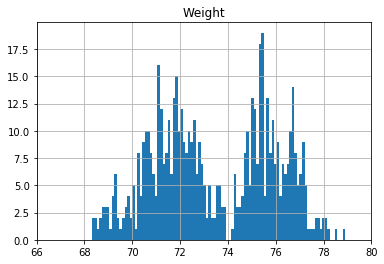

In [413]:
df.hist(column="Weight", bins=100)
plt.xlim(66,80)
plt.show()

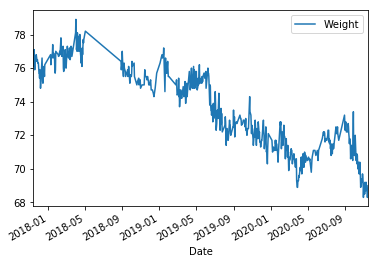

In [414]:
df.plot(x="Date",y="Weight")
plt.show()

In [375]:
df_year = df[["Year","Weight"]].groupby(["Year"]).count()
df_year.columns = ["count"]
df_year["mean"] = df[["Year","Weight"]].groupby(["Year"]).mean()
df_year["var"] = df[["Year","Weight"]].groupby(["Year"]).var()
df_year["std"] = df[["Year","Weight"]].groupby(["Year"]).std()
df_year = df_year.reset_index()
df_year["Date"] = pd.to_datetime(df_year["Year"].map('{:04}-01-01'.format), format='%Y-%m-%d')
df_year

,Year,count,mean,var,std,Date
0,2017,32,76.090625,0.284103,0.533013,2017-01-01
1,2018,132,76.287121,0.915024,0.956569,2018-01-01
2,2019,209,73.746890,2.422887,1.556563,2019-01-01
3,2020,201,70.853731,1.154099,1.074290,2020-01-01


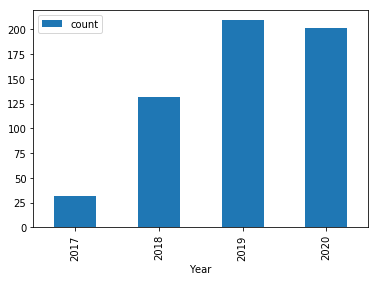

In [339]:
df_year.plot.bar(x="Year",y="count")
plt.show()

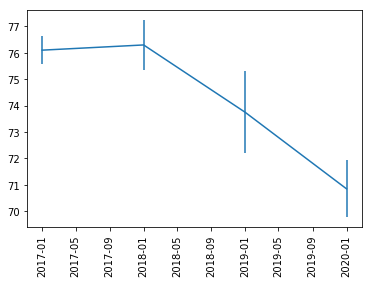

In [419]:
plt.errorbar(x=df_year["Date"],y=df_year["mean"],yerr=df_year["std"])
plt.xticks(rotation=90)
plt.show()

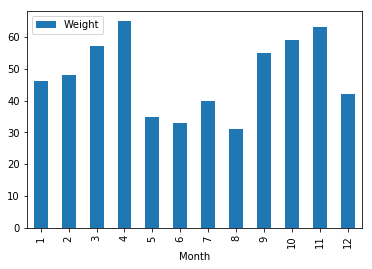

In [337]:
df[["Month","Weight"]].groupby(["Month"]).count().plot.bar()
plt.show()

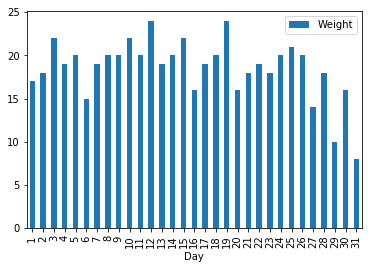

In [336]:
df[["Day","Weight"]].groupby(["Day"]).count().plot.bar()
plt.show()

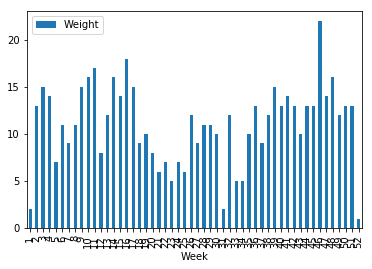

In [335]:
df[["Week","Weight"]].groupby(["Week"]).count().plot.bar()
plt.show()

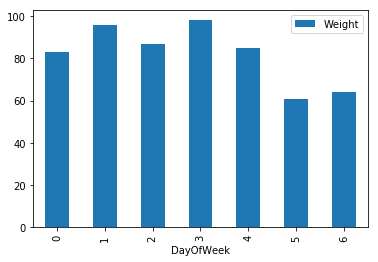

In [334]:
df[["DayOfWeek","Weight"]].groupby(["DayOfWeek"]).count().plot.bar()
plt.show()

In [377]:
df_month = df[["Year","Month","Weight"]].groupby(["Year","Month"]).count()
df_month.columns = ["count"]
df_month["mean"] = df[["Year","Month","Weight"]].groupby(["Year","Month"]).mean()
df_month["var"] = df[["Year","Month","Weight"]].groupby(["Year","Month"]).var()
df_month["std"] = df[["Year","Month","Weight"]].groupby(["Year","Month"]).std()
df_month = df_month.reset_index()
df_month["YearMonth"] = df_month["Year"].map('{:04}'.format) + "-" +df_month["Month"].map('{:02}'.format)
df_month["Date"] = pd.to_datetime(df_month["Year"].map('{:04}'.format) + "-" 
                                 + df_month["Month"].map('{:02}'.format) + "-01", format='%Y-%m-%d')
df_month.head()

,Year,Month,count,mean,var,std,YearMonth,Date
0,2017,11,16,76.468750,0.082292,0.286865,2017-11,2017-11-01
1,2017,12,16,75.712500,0.199833,0.447027,2017-12,2017-12-01
2,2018,1,14,76.564286,0.228626,0.478149,2018-01,2018-01-01
3,2018,2,18,76.716667,0.273235,0.522719,2018-02,2018-02-01
4,2018,3,14,76.871429,0.248352,0.498349,2018-03,2018-03-01


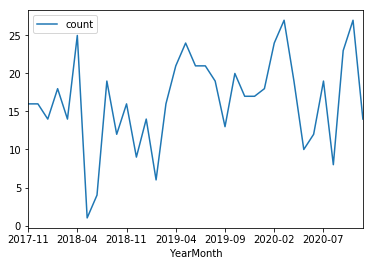

In [417]:
df_month.plot(x="YearMonth",y="count")
plt.show()

(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]), <a list of 9 Text xticklabel objects>)

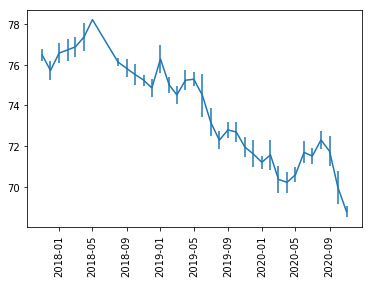

In [378]:
plt.errorbar(x=df_month["Date"],y=df_month["mean"],yerr=df_month["std"])
plt.xticks(rotation=90)

In [408]:
df_week = df[["Year","Week","Weight"]].groupby(["Year","Week"]).count()
df_week.columns = ["count"]
df_week["mean"] = df[["Year","Week","Weight"]].groupby(["Year","Week"]).mean()
df_week["var"] = df[["Year","Week","Weight"]].groupby(["Year","Week"]).var()
df_week["std"] = df[["Year","Week","Weight"]].groupby(["Year","Week"]).std()
df_week = df_week.reset_index()
df_week["YearWeek"] = df_week["Year"].map('{:04}'.format) + "-" +df_week["Week"].map('{:02}'.format)
df_week["Date"] = df_week["Year"].map('{:04}'.format) + "-W" + df_week["Week"].map('{:02}'.format) + "-01"
df_week["Date"] = df_week["Date"].apply(lambda x: datetime.datetime.strptime(x, '%Y-W%W-0%w'))
df_week["Date"] = pd.to_datetime(df_week["Date"], format='%Y-%m-%d')
df_week.head()

,Year,Week,count,mean,var,std,YearWeek,Date
0,2017,46,7,76.471429,0.175714,0.419183,2017-46,2017-11-13
1,2017,47,6,76.516667,0.021667,0.147196,2017-47,2017-11-20
2,2017,48,6,76.083333,0.113667,0.337145,2017-48,2017-11-27
3,2017,49,4,75.425000,0.215833,0.464579,2017-49,2017-12-04
4,2017,50,5,75.740000,0.373000,0.610737,2017-50,2017-12-11


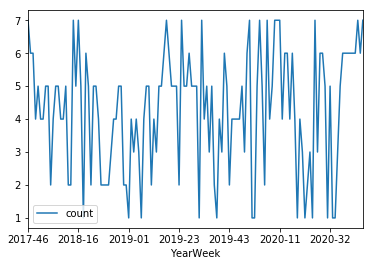

In [416]:
df_week.plot(x="YearWeek",y="count")
plt.show()

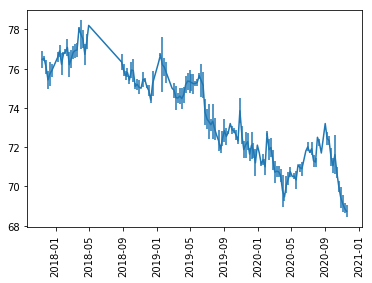

In [410]:
plt.errorbar(x=df_week["Date"],y=df_week["mean"],yerr=df_week["std"])
plt.xticks(rotation=90)
plt.show()